### Multiple Plots and Map Projections

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr


In [2]:
ds = xr.tutorial.load_dataset('air_temperature')
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , ..., 235.5    , 238.59999],
        [243.79999, 244.5    , ..., 235.29999, 239.29999],
        ...,
        [295.9    , 296.19998, ..., 295.9    , 295.19998],
        [296.29   , 296.79   , ..., 296.79   , 296.6    ]],

       [[242.09999, 242.7    , ..., 233.59999, 235.79999],
        [243.59999, 244.09999, ..., 232.5    , 235.7    ],
        ...,
        [296.19998, 296.69998, ..., 295.5    , 295.1    ],
        [296.29   , 297.19998, ..., 296.4    , 296.6    ]],

       ...,

       [[245.79   , 244.79   , ..., 243.98999, 244.79   ],
        [249.89   , 249.29   , ..., 242.48999, 244.29   ],
        ...,
        [296.29   , 297.19   , ..., 295.09   , 294.38998],
        [297.79   , 298.38998, ..., 295.49   , 295.19   ]],

       [[245.09   , 244.29   , ..., 241.48999, 241.79   ],
        [249.89   , 249.29   , ..., 240.29   , 241.68999],
        ...,
        [296.09   , 296.88998, ..., 295.69   , 

In [3]:
air = ds.air.isel(time=[0, 724]) - 273.15
air

<xarray.DataArray 'air' (time: 2, lat: 25, lon: 53)>
array([[[-31.949997, -30.649994, ..., -37.649994, -34.550003],
        [-29.350006, -28.649994, ..., -37.850006, -33.850006],
        ...,
        [ 22.75    ,  23.049988, ...,  22.75    ,  22.049988],
        [ 23.140015,  23.640015, ...,  23.640015,  23.450012]],

       [[  0.549988,  -0.149994, ...,  -6.549988,  -4.950012],
        [  2.350006,   2.049988, ...,  -5.859985,  -3.450012],
        ...,
        [ 25.350006,  25.450012, ...,  22.950012,  22.75    ],
        [ 25.140015,  25.549988, ...,  24.140015,  23.950012]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-07-01

In [4]:
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)

/Users/grandhis/Desktop/SCU/research_assistant/preparation/preparation-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


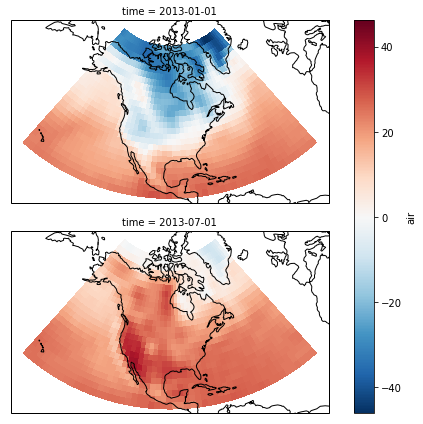

In [5]:
p = air.plot(transform=ccrs.PlateCarree(),
            col='time', col_wrap=1,
            aspect=ds.dims['lon'] / ds.dims['lat'],
            subplot_kws = {'projection': map_proj})

for ax in p.axes.flat:
    ax.coastlines()
    ax.set_extent([-160, -30, 5, 75])
    ax.set_aspect('equal', 'box-forced')
    
plt.show()